# Figure 6: Convergence of the cost of the global optimum with N finite to cost of the mean field optimum

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from mfg_computation import Parameters, mf_optimum, get_globaloptimum_n_players, get_equilibrium_n_players

System parameters, costs and initial conditions

In [2]:
PARAMS = Parameters() # default parameters from paper
gamma = PARAMS.gamma # infection rate
rho = PARAMS.rho     # recovery rate
vac_min, theta = PARAMS.vac_min, PARAMS.theta # min/max vaccination rate
T = PARAMS.T # time horizon

c_V = PARAMS.c_V       # cost per unit time of vaccination
c_I = PARAMS.c_I      # cost per unit time of infection

# initial conditions
S0 = 0.4        # proportion of susceptible at t=0
I0 = 0.4        # proportion of infected at t=0

We compute the cost of the mean-field optimum

In [3]:
cost_mfopt, thr_ = mf_optimum(PARAMS, S0, I0, C=10000);
print("Cost of the mean-field global optimum when the initial state is ", S0,I0)
print(cost_mfopt)

Cost of the mean-field global optimum when the initial state is  0.4 0.4
0.6818327585381363


In [4]:
values_of_N = np.array([10,20,30,50])
costs_globalopt = []
for N in values_of_N:
    bestpol, J = get_globaloptimum_n_players(N)
    costs_globalopt.append(J[int(S0*N),int(I0*N),0])
    print(N, J[int(S0*N),int(I0*N),0] )

10 0.6445194344927112
20 0.6623916597900199
30 0.668795638793888
50 0.6739785119975157


Text(0.5, 0, 'Number of players N')

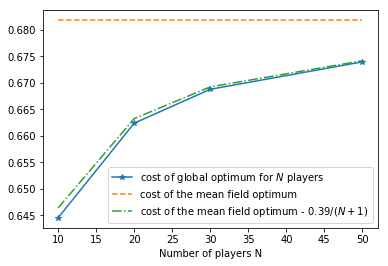

In [5]:
b=0.39
fig = plt.figure()
fig.set_size_inches((6,4))
plt.plot(values_of_N,costs_globalopt,'*-')
plt.plot(values_of_N,np.ones(len(values_of_N))*cost_mfopt,'--')
plt.plot(values_of_N,cost_mfopt-b/(values_of_N+1),'-.')

plt.legend(['cost of global optimum for $N$ players','cost of the mean field optimum',
            'cost of the mean field optimum - $0.39/(N+1)$'])
plt.xlabel('Number of players N')
#plt.savefig('valuefunction_DEC.pdf', bbox_inches='tight')